#                    Spectral components in (seismic) time series

## Learning outcomes

The target learning outcomes of this lecture are

* Don't be afraid of the (Discrete) Fourier Transform!
* Understand how a time domain signal is transformed into the spectral domain based on decomposition using cosine and sine basis functions.

## 0 Preliminaries

**TINKER:** To fire up the Python environment used below, click (somewhere) in the next cell and
* _hold `shift` when pressing `enter`_
* _or click on the `>| Run` button in the menu on the top of the page._

Then the value of $\pi$ should be displayed below the cell, `pi = 3.14159`, as well as other content needed below.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import auxiliary_functions as auxf
%matplotlib inline
# work with N samples; build n-vector; make target time series
pi = np.pi; N = 100; n = np.arange(0,N)
dataargument = 3*2*pi*n/N; data = np.cos(dataargument) # this is the x_n, the time series data used below
print('pi is pi: pi = %g'%(pi));          print('data length: N = %i'%N)
print('n is a N-long vector: n = ',n);    print('data is a N-long vector, too!')

pi is pi: pi = 3.14159
data length: N = 100
n is a N-long vector: n =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
data is a N-long vector, too!


## 1 Introduction

Time series galore!

**FIGURE 1**

<img src="./figure_timeseries.png" alt="Drawing" style="width: 950px;"/>



Using the _Fourier Transform_ (FT) the information contained in a time series is often better studied in the _frequency domain_ or _spectral domain_. More generally, the manipulation of time series in the broad context of signal processing is often easier in the spectral domain. Figure 2 shows an example DFT pair, a seismogram and the P-wave spectra to which a model is fit to estimate released energy (related to $\Omega_0$) and size (related to $f_c$).

**FIGURE 2**

<img src="./figure_seismogram_spectrum.png" alt="Drawing" style="width: 550px;"/>


## 2 The Discrete Fourier Transform DFT

The key objective of the DFT decomposition is to measure how much of the time domain signal can be explained by the cosine and sine **basis functions** of different frequencies (= how often/fast the cosine/sine functions 'wiggle' over the signal length).

This figure sketches the DFT pair of a $N=16$ point long time series and the corresponding suite of nine cosine and sine amplitude (or weights):

**FIGURE 3**

<img src="./figure_DFTterminology_timefrequencydomain.png" alt="Drawing" style="width: 500px;"/>

### 2.1 The forward DFT or analysis equations

Linear combinations of **weighted** sine and cosine functions can be used to represent the time domain signal. The weights can be found by regression or correlation; the DFT / FFT works by **correlation**.

The principle of correlation: **To detect a known waveform contained in another signal, multiply the two and add the points in the resulting product, and this single number is a measure of how similar the two signals are**. Here, that number is the cosine/sine amplitude or weight. The DFT analysis equations are

\begin{eqnarray}
\mathrm{Re}(X_\color{red}{k}) & = &\quad\sum_{\color{blue}{n}=0}^{\color{green}{N}-1}x_\color{blue}{n}\cos(\color{red}{k}\,2\pi\,\color{blue}{n}/\color{green}{N})\\
\mathrm{Im}(X_\color{red}{k}) & = &\,-\sum_{\color{blue}{n}=0}^{\color{green}{N}-1}x_\color{blue}{n}\sin(\color{red}{k}\,2\pi\,\color{blue}{n}/\color{green}{N})
\end{eqnarray}

Let's understand the ingredients:
* $\mathrm{Re}$ and $\mathrm{Im}$ stands for Real and Imaginary part of the complex FT $X$ (synonymous to cosine and sine weigths)
* (The minus sign in the $\mathrm{Im}(X_k)$ expression makes the real DFT consistent with the complex DFT; can be neglected)
* $\color{red}{k}$ is the frequency (integer) 
* $X_\color{red}{k}$ is the FT of the $\color{green}{N}$-long time domain signal $x_\color{blue}{n}$ $\rightarrow$ $X_\color{red}{k}$ is _one_ FT value at $\color{red}{k}$
* $2\pi$: full cycle of cosine and sine function
* $\color{blue}{n}/\color{green}{N}$ is the fraction of the full cycle $2\pi$ \$\rightarrow$ $\cos(\color{red}{k} 2\pi \color{blue}{n}/\color{green}{N})$ has the same length as $x_\color{blue}{n}$

Using Euler's relation 
\begin{equation}
e^{\pm i \varphi} = \cos \varphi\pm i \sin \varphi
\end{equation}

the analysis equation is expressed in terms of complex exponentials (as said, $X_k$ is complex (anyway...))

\begin{equation}
X_k = \sum_{n=0}^{N-1}x_n e^{-2\pi ik n /N}
\end{equation}

### 2.2 The amplitude (and phase) spectrum


The $\mathrm{Re}(X_k)$ and $\mathrm{Im}(X_k)$ values obtained with the analysis equation have to be converted to the amplitude (or magnitude) $A$ and phase $\phi$ spectrum:

\begin{eqnarray}
A_k    & = & \sqrt{\mathrm{Re}(X_k)^2 + \mathrm{Im}(X_k)^2}\\
\phi_k & = & \mathrm{arctan} \left(\frac{\mathrm{Im}(X_k)}{\mathrm{Re}(X_k)}\right)
\end{eqnarray}

The spectral amplitudes in the Introduction are the amplitude spectrum.

## 3 Hands on!

### Task 1: Frequency

Recall: $\qquad \mathrm{Re}(X_\color{red}{k}) = \sum_{\color{blue}{n}=0}^{\color{green}{N}-1}x_\color{blue}{n}\cos(\color{red}{k}\,2\pi\,\color{blue}{n}/\color{green}{N})  \qquad   \mathrm{Im}(X_\color{red}{k}) = \sum_{\color{blue}{n}=0}^{\color{green}{N}-1}x_\color{blue}{n}\sin(\color{red}{k}\,2\pi\,\color{blue}{n}/\color{green}{N})$

We explore the effect of the frequency-value $\color{red}{k}$ on the similarity of the cosine and sine basis or test functions to a sinusoidal (=cosine/sine function of arbitrary phase) data time series (the $x_n$ from above; plotted in gray).

**TINKER:** _Choose different $k$ values (integers! start with 0, `k = 0`) to explore the effect on the cosine and sine test functions._
* _Note the values for Re(X_k) and Im(X_k) printed below the figures._
* _What do they tell you about the similarity between data and basis/test functions?_

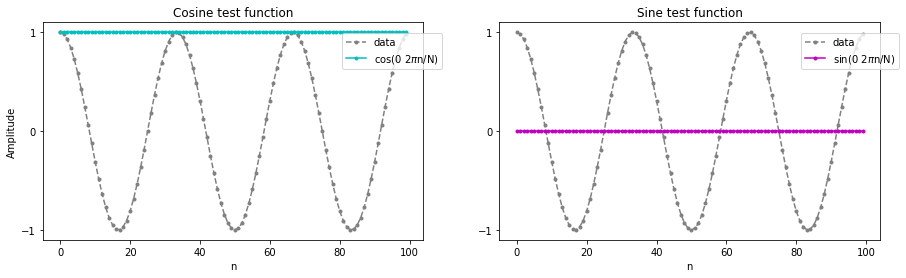

	Cosine weight Re(X_k) = 0.0000				Sine weight Im(X_k) = -0.0000


In [15]:
# TINKER LINE ... TINKER LINE ... TINKER LINE ... TINKER LINE ... TINKER LINE ... 
k = 0  # choose your k! 

# the analysis equation: correlation
ReXk =  np.sum( data * np.cos(k*2*pi*n/N) )
ImXk = -np.sum( data * np.sin(k*2*pi*n/N) )
# behind the scene plotting
auxf.aux_plot_kcosinesine(k,n,data,np.cos(k*2*pi*n/N),np.sin(k*2*pi*n/N))
print('\tCosine weight Re(X_k) = %2.4f\t\t\t\tSine weight Im(X_k) = %2.4f'%(ReXk/(N/2),ImXk/(N/2)))

### Task 2: Decomposition of arbitrarily phased sinusoid

The gray sinusoidal data time series in Task 1 was a 'pure' cosine function. However, a (seismic) signal can have any phase. Here we see that any sinusoid can be decomposed into a linear combination of properly weighted cosine and sine functions.

**TINKER:**
1. _Apply different phase shifts, e.g., `phaseshift = -pi/2`, to the orginal data cosine function in gray. The resulting new time series is plotted in red._
2. _Change the `decompose` statement from False to True (have `decompose = True`). When you run the cell now, a model function is plotted in black. The right panel shows how that black model function is decomposed into a cosine and sine function, i.e., the sum of the cyan and magenta curves yields the black curve._
   * _Apply again different phase shifts; can you find a `phaseshift` value for which no fitting model can be found?_
   * _The cosine and sine weights are printed below the figures. **Let's talk about how that relates to the amplitude (and phase) spectrum!**_

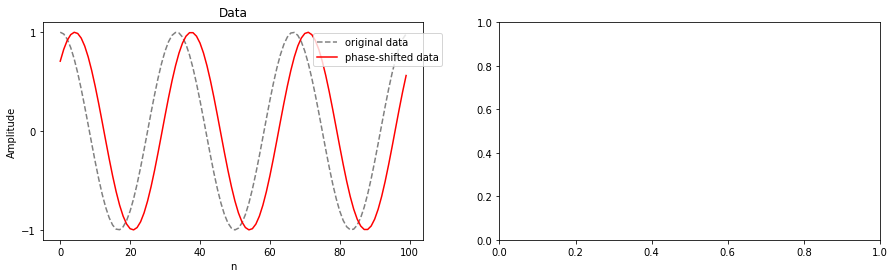

In [16]:
# TINKER LINE ... TINKER LINE ... TINKER LINE ... TINKER LINE ... TINKER LINE ... 
phaseshift = -pi/4  # choose phase shift between [-pi/1 0], e.g. [-pi/8, -pi/4, -pi/3, -pi/2, ...]

newargument = dataargument + phaseshift;    newdata = np.cos(newargument) # this is the new phase-shifted data

# TINKER LINE ... TINKER LINE ... TINKER LINE ... TINKER LINE ... TINKER LINE ... 
decompose = False
a, b = auxf.aux_plot_modeldecomposition(n,data,newdata,dataargument,decompose) # decomposition and plotting 
if decompose:
    print("The sine- and cosine-weights are %5.3f, %5.3f"%(a, b));

## 4 Decomposition understood!

(Learning outcome revisited) You now understand **the ingredients of the decomposition** of a 16-point example time series into corresponding nine 16 samples long properly weighted (amplitude values!) cosine and sine functions of discrete frequencies:

**FIGURE 4**
<img src="./figure_decompositionsynthesis_cosinesinewaves.png" alt="Drawing" style="width: 900px;"/>